In [ ]:
# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading data and info about it

In [2]:
df = pd.read_csv("C:/Users/Dell/Desktop/Jupyter MLT/loan_prediction.csv", encoding="utf-8")

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.shape

(614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Cleaning data

In [10]:
# Duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows : {duplicates}")

Number of duplicated rows : 0


In [11]:
# Duplicate rows in Loan_ID
duplicates2 = df["Loan_ID"].duplicated().sum()
print(f"Number of duplicated rows in Loan_ID column : {duplicates2}")

Number of duplicated rows in Loan_ID column : 0


In [14]:
# Count null fields
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# object collumns has null values [Gender, Married, Dependents, Self_Employed]
# numeric collumns has null values [LoanAmount, Loan_Amount_Term, Credit_History]

In [3]:
# fill the null values of object datatype
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [4]:
# fill the null values of numerical datatype
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

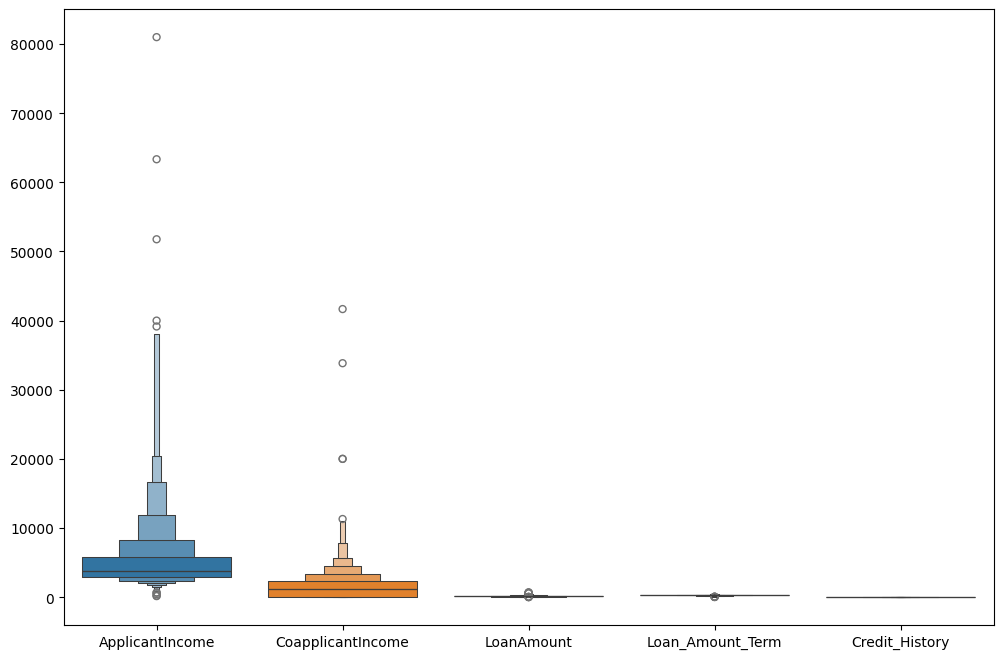

In [24]:
# Checking the outliers
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df)


Value counts for Gender :
Gender
Male      489
Female    112
Name: count, dtype: int64


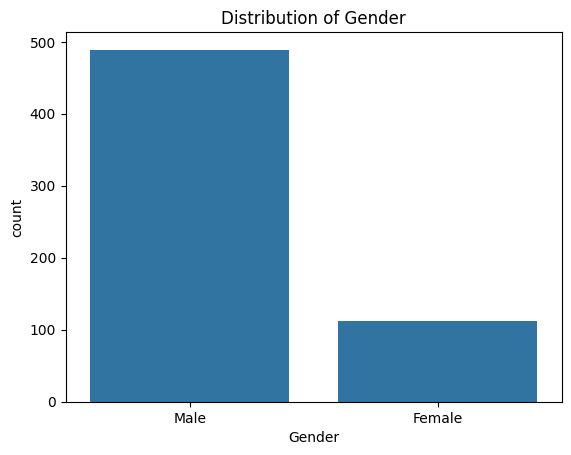


Value counts for Married :
Married
Yes    398
No     213
Name: count, dtype: int64


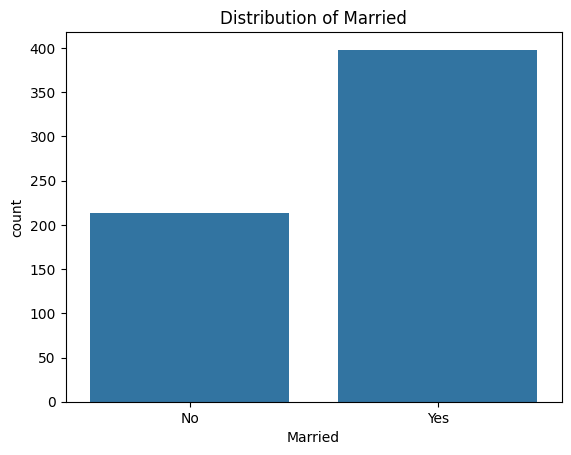


Value counts for Dependents :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


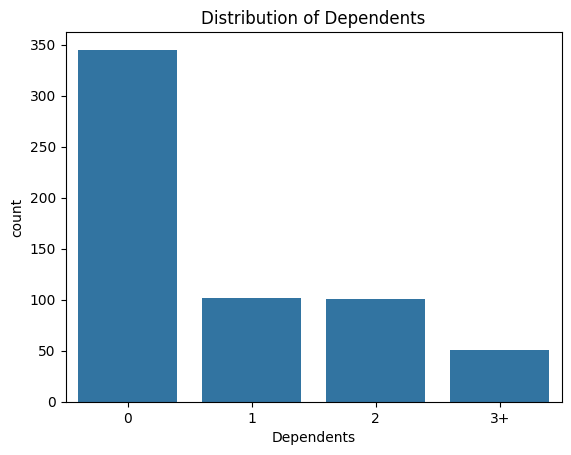


Value counts for Education :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


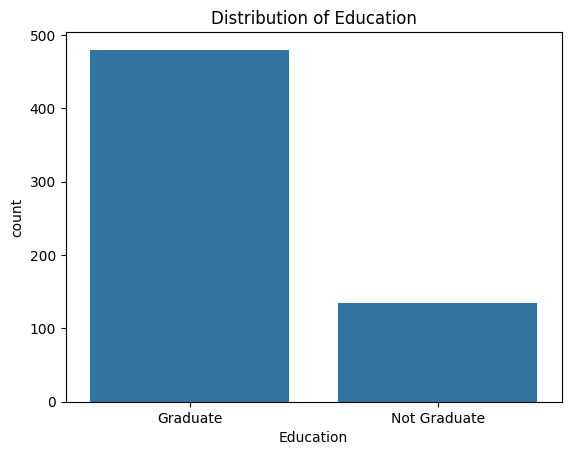


Value counts for Self_Employed :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


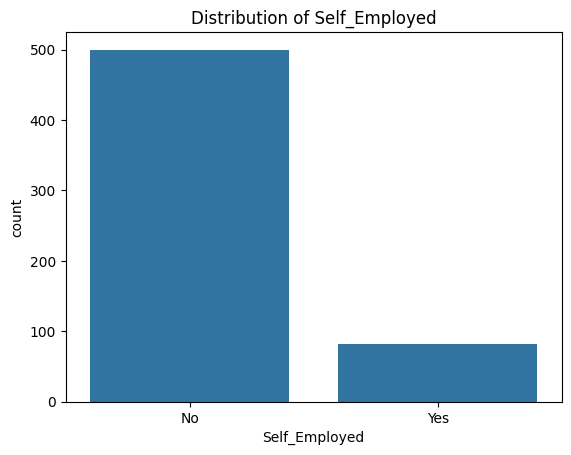


Value counts for Credit_History :
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


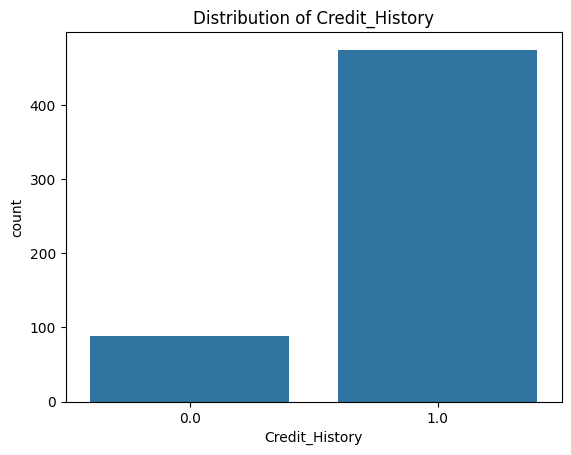


Value counts for Property_Area :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


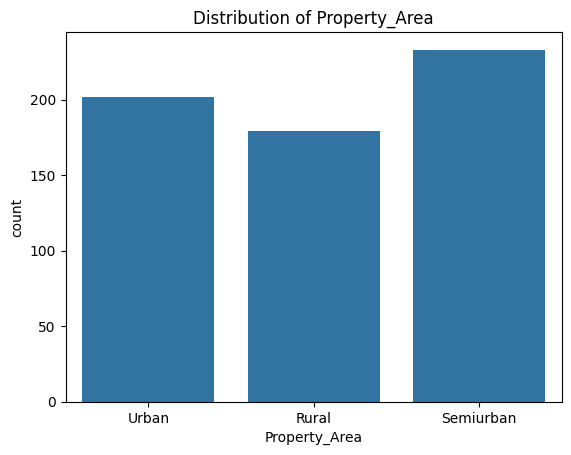


Value counts for Loan_Status :
Loan_Status
Y    422
N    192
Name: count, dtype: int64


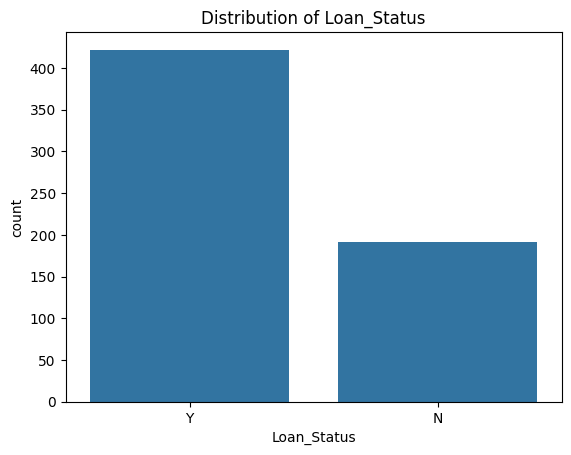

In [3]:
# Display Plot for object columns showing there value counts
cat_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in cat_col:
    print(f"\nValue counts for {col} :")
    print(df[col].value_counts()) # Show value counts for each column
    sns.countplot(x=col, data=df) # Show count plot for each column
    plt.title(f'Distribution of {col}')
    plt.show()

Loan_Status  Gender
N            Male      150
             Female     37
Y            Male      339
             Female     75
Name: count, dtype: int64


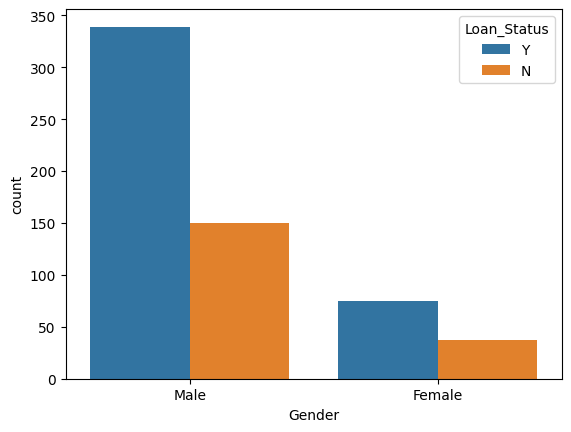

In [28]:
# Gender and Loan_Status relation
Gender_LoanStatus_Group = df.groupby('Loan_Status')['Gender'].value_counts()
print(Gender_LoanStatus_Group)
sns.countplot(x ='Gender', hue = "Loan_Status", data = df)
plt.show()


 Target Varibale (Loan Status) Ditribuation
Loan_Status
Y    422
N    192
Name: count, dtype: int64


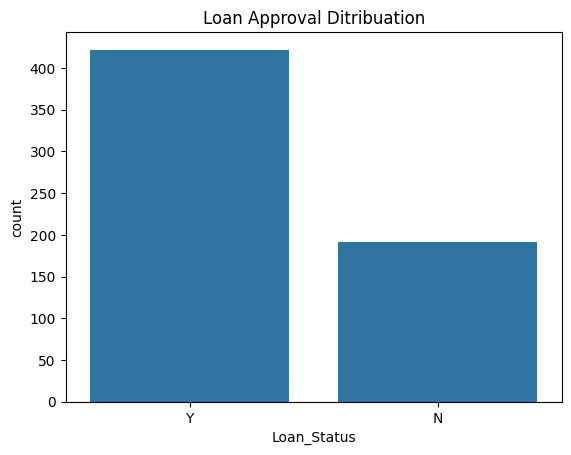

In [24]:
# Visualize the ditribution of the target variavle (Loan_Status)
print("\n Target Varibale (Loan Status) Ditribuation")
print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Ditribuation")
plt.show()

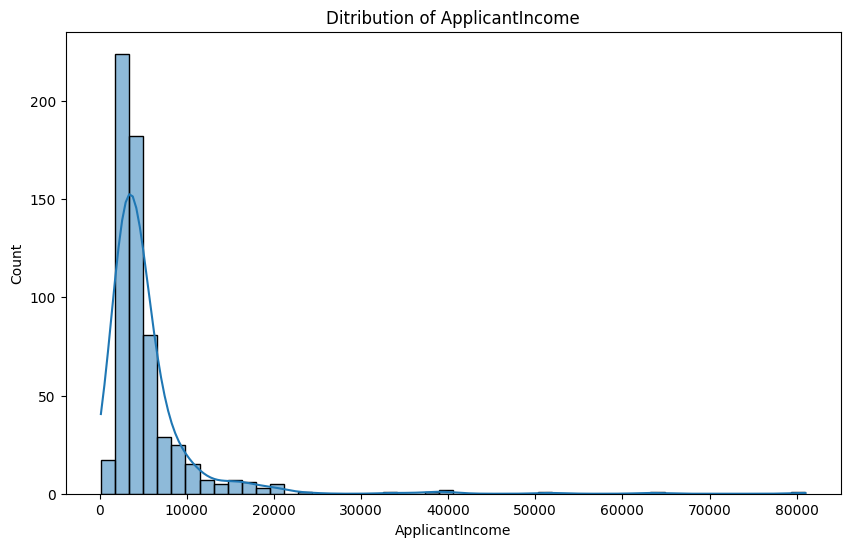

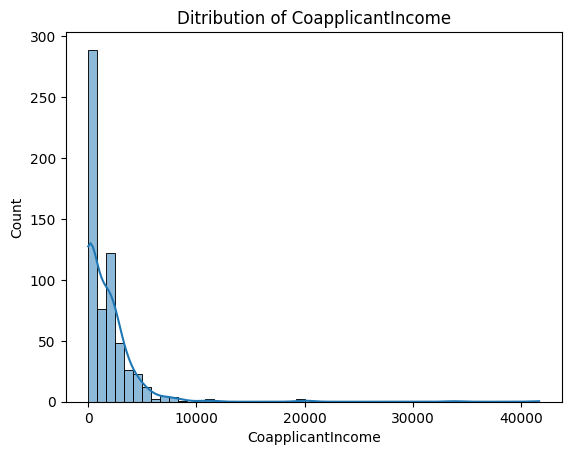

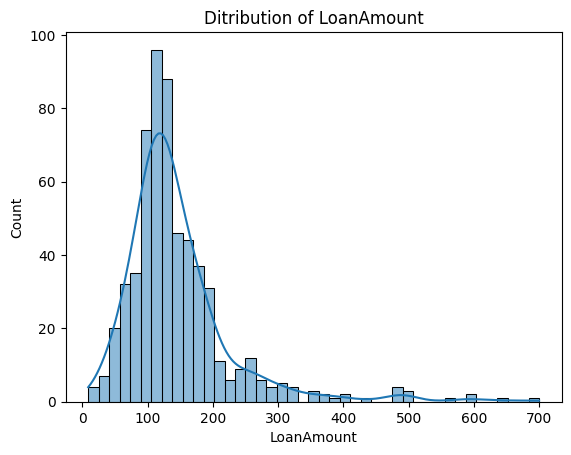

In [32]:
# Histograms for outliers ( As shown before: outliers appears in 3 columns )
plt.figure(figsize=(10, 6))
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'] :
    sns.histplot(df[col], kde=True)
    plt.title(f'Ditribution of {col}')
    plt.show()    

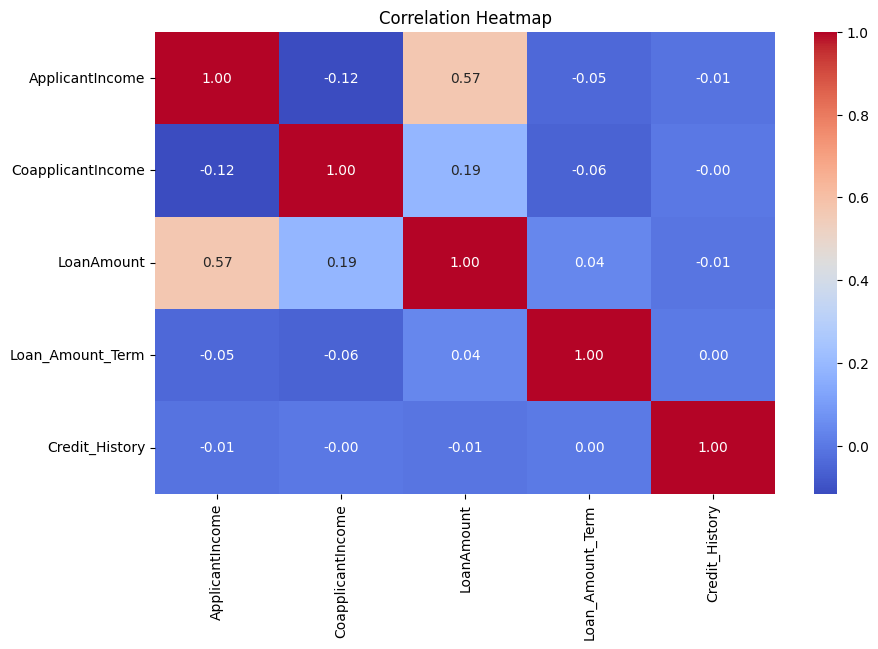

In [7]:
# Show the correlation (relation) between numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Feature Engineering

In [5]:
# Create new column (Total_Income)
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


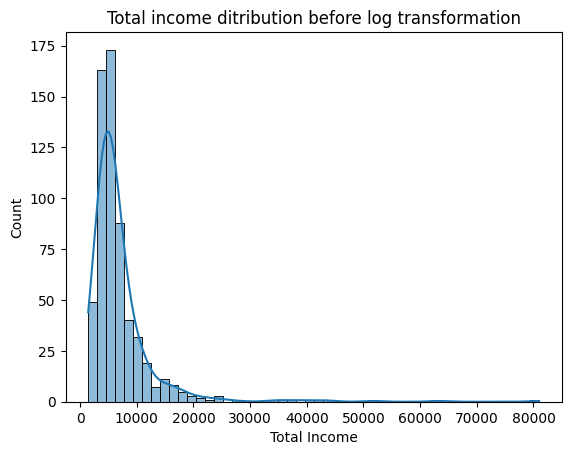

In [7]:
# Show distribution for Total_Income before log transformation
sns.histplot(df['Total_Income'], kde=True)
plt.title('Total income ditribution before log transformation')
plt.xlabel('Total Income')
plt.show()

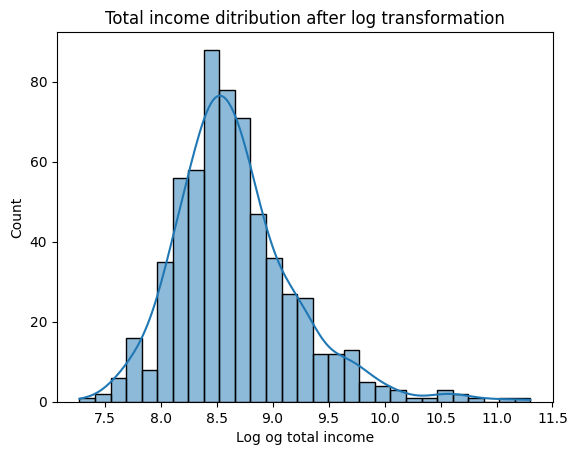

In [6]:
# Apply log transformation for Total_Income to reduce skewness
df['Log_Total_Income'] = np.log1p(df['Total_Income'])
sns.histplot(df['Log_Total_Income'], kde=True)
plt.title('Total income ditribution after log transformation')
plt.xlabel('Log og total income')
plt.show()

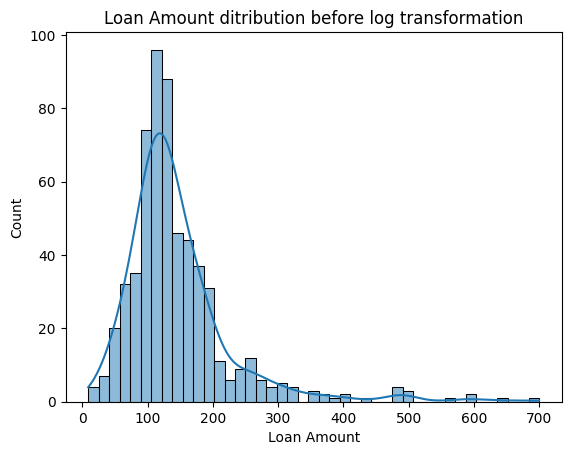

In [10]:
# Show distribution for LoanAmount before log transformation
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount ditribution before log transformation')
plt.xlabel('Loan Amount')
plt.show()

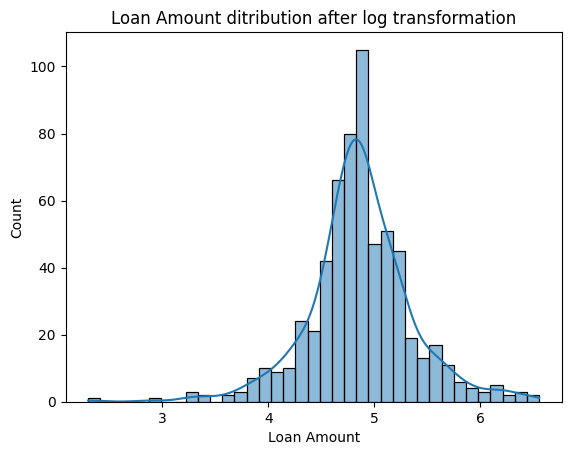

In [7]:
# Apply log transformation for LoanAmount to reduce skewness
df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])
sns.histplot(df['Log_LoanAmount'], kde=True)
plt.title('Loan Amount ditribution after log transformation')
plt.xlabel('Loan Amount')
plt.show()

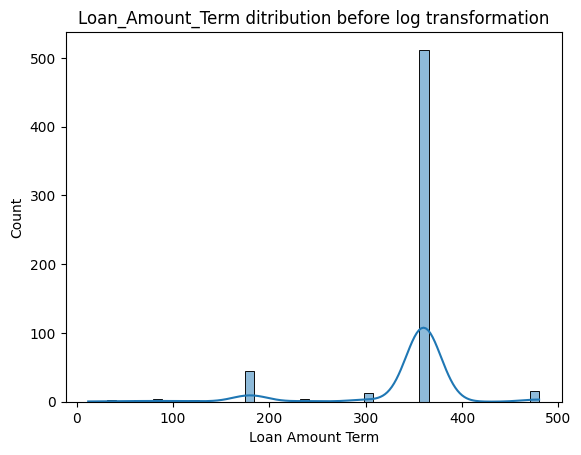

In [13]:
# Show distribution for Loan_Amount_Term before log transformation
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.title('Loan_Amount_Term ditribution before log transformation')
plt.xlabel('Loan Amount Term')
plt.show()

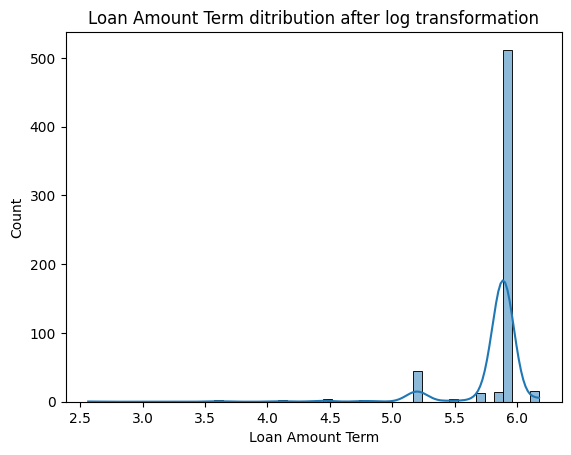

In [10]:
# Apply log transformation for Loan_Amount_Term to reduce skewness
df['Log_Loan_Amount_Term'] = np.log1p(df['Loan_Amount_Term']) 
sns.histplot(df['Log_Loan_Amount_Term'], kde=True)
plt.title('Loan Amount Term ditribution after log transformation')
plt.xlabel('Loan Amount Term')
plt.show()

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714732,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505525,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878


In [11]:
# Drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID']
existing_cols = [ col for col in cols if col in df.columns ]
df = df.drop(columns = existing_cols)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714732,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505525,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878


In [13]:
# Convert string columns to numeric
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878
1,1,1,1,0,0,1.0,0,0,8.714732,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,8.505525,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878
5,1,1,2,0,1,1.0,2,1,9.170976,5.590987,5.888878
6,1,1,0,1,0,1.0,2,1,8.255828,4.564348,5.888878
7,1,1,3,0,0,0.0,1,0,8.619930,5.068904,5.888878
8,1,1,2,0,0,1.0,2,1,8.618485,5.129899,5.888878
9,1,1,1,0,0,1.0,1,0,10.077861,5.857933,5.888878


In [13]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
Log_Total_Income        float64
Log_LoanAmount          float64
Log_Loan_Amount_Term    float64
dtype: object

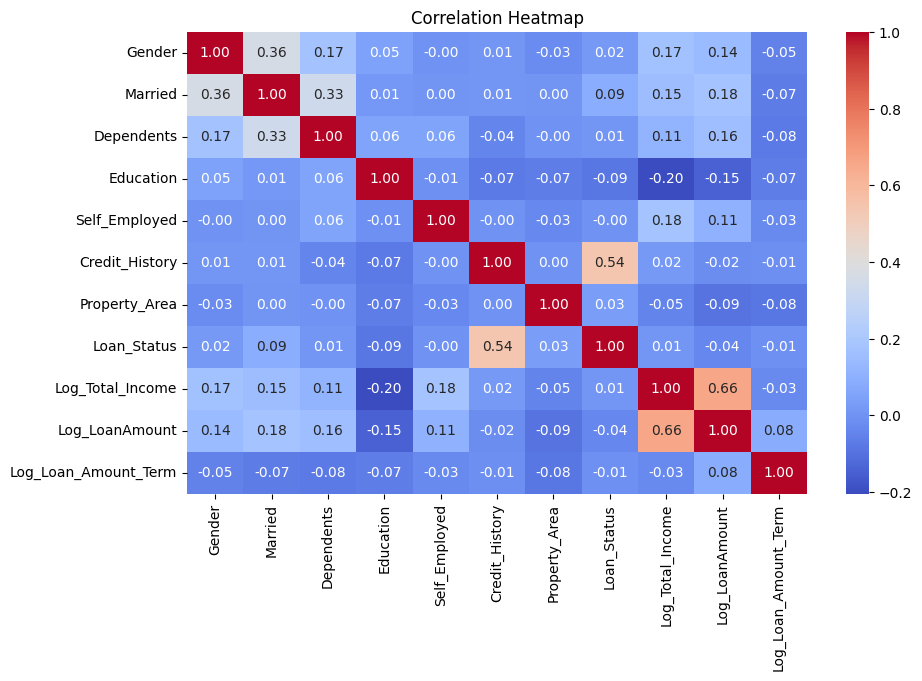

In [45]:
# Show the correlation (relation) between all columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Split data to train and test
X = df.iloc[:, np.r_[0:7, 8:11]]
y = df.iloc[:, 7]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [47]:
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
# rfc model metrics
from sklearn import metrics
from sklearn.metrics import classification_report
y_pred = rfc_model.predict(X_test)

print('Accuracy of rfc model is : ', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of RFC model is :  0.7886178861788617
              precision    recall  f1-score   support

           0       0.67      0.42      0.52        33
           1       0.81      0.92      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.79      0.77       123



In [60]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [68]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [70]:
# nb model metrics
y_pred = nb_model.predict(X_test)
print('Accuracy of nb model is : ', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of nb model is :  0.8211382113821138
              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



In [71]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [72]:
# dtc model metrics
y_pred = dtc_model.predict(X_test)
print('Accuracy of dtc model is : ', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of dtc model is :  0.6910569105691057
              precision    recall  f1-score   support

           0       0.44      0.61      0.51        33
           1       0.83      0.72      0.77        90

    accuracy                           0.69       123
   macro avg       0.64      0.66      0.64       123
weighted avg       0.73      0.69      0.70       123



In [75]:
# K Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier()
knc_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [76]:
# knc model metrics
y_pred = knc_model.predict(X_test)
print('Accuracy of knc model is : ', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of knc model is :  0.7886178861788617
              precision    recall  f1-score   support

           0       0.68      0.39      0.50        33
           1       0.81      0.93      0.87        90

    accuracy                           0.79       123
   macro avg       0.75      0.66      0.68       123
weighted avg       0.77      0.79      0.77       123



In [80]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
# lg model metrics
y_pred = lg_model.predict(X_test)
print('Accuracy of lg model is : ', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of lg model is :  0.8292682926829268
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

